# 🎯 Workshop: Detección de Fraude con Machine Learning

## Objetivos del Workshop

En este notebook aprenderás:

1. ✅ Identificar y manejar datasets desbalanceados
2. ✅ Aplicar técnicas de balanceo (SMOTE, class weights)
3. ✅ Evaluar modelos con métricas apropiadas
4. ✅ Optimizar threshold para maximizar recall
5. ✅ Calcular costos de negocio
6. ✅ Interpretar resultados correctamente

---

## 📊 El Problema

Tenemos un dataset de **250,000 transacciones (eso creemos)** de e-commerce:
- 97% son transacciones normales
- 3% son fraudes

**Desafío**: Construir un modelo que detecte la mayor cantidad de fraudes posible.

---
## 📦 Sección 1: Setup e Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score,
    precision_recall_curve, auc
)

# Para SMOTE
try:
    from imblearn.over_sampling import SMOTE
    print("✅ imblearn instalado")
except ImportError:
    print("⚠️  imblearn no está instalado. Instalar con: pip install imbalanced-learn")

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup completo")

✅ imblearn instalado
✅ Setup completo


---
## 📊 Sección 2: Cargar y Explorar Datos

In [ ]:
# Cargar dataset
df = pd.read_csv('DATA/clean/fraud_dataset_v2.csv')

print("📊 INFORMACIÓN DEL DATASET")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nPrimeras filas:")
df.head()

📊 INFORMACIÓN DEL DATASET
Shape: (250000, 24)

Primeras filas:


,Unnamed: 0,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,fecha,monto,score,fraude
0,0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,...,1,NaN,N,0.40,94436,0,2020-03-27 11:51:16,5.64,66.0,0
1,1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,...,1,Y,N,0.02,9258,0,2020-04-15 19:58:08,124.71,72.0,0
2,2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,...,1,NaN,N,0.06,242549,0,2020-03-25 18:13:38,339.32,95.0,0
3,3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,...,1,NaN,Y,0.98,18923,100,2020-04-16 16:03:10,3.54,2.0,0
4,4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,...,1,NaN,N,0.28,5728,0,2020-04-02 10:24:45,3.53,76.0,1


In [4]:
# Cantidad de valores únicos en la columna
cantidad_unicos = df['i'].nunique()
print(cantidad_unicos)
print(len(df))

127804
250000


In [5]:
df['i'].value_counts()

i
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     137
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram          81
Clean Sept - Álcool Em Gel 70% 500 Ml                            81
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un     77
Bebedouro Bomba Elétrica P Garrafão Galão Água Recarregável      68
                                                               ... 
Bota Gaúcha, Cano Duro                                            1
Feliway Difusor E Refil Sistema De Terapia Para Gatos - Ceva      1
Tinta Evolution Color Of Cube 3d 60ml Alfaparf Cor 4.66i C/3      1
Cortina Acústica Omega Anti Ruídos Blackout Térmica Promoçao      1
Teclado P/ Acer Aspire 5733-6898 5733-6644 As5733-6644 Com Ç      1
Name: count, Length: 127804, dtype: int64

In [6]:
# Veamos un ejemplo de un producto en particular
df[df['i']=='Fone De Ouvido Sem Fio Xiaomi Airdots Preto']

,Unnamed: 0,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,fecha,monto,score,fraude
323,323,4,0.7838,30016.11,50.0,0.067521,14.0,BR,1,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,Y,0.98,30016,100,2020-04-08 11:49:43,22.51,64.00,0
1717,1717,4,0.8481,8866.47,4.0,0.000000,0.0,BR,0,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,N,0.08,8866,0,2020-04-16 16:09:10,24.75,84.00,0
3302,3302,4,0.7921,513004.99,34.0,0.000000,5.0,BR,2,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,Y,0.66,513004,100,2020-04-14 08:58:37,26.49,11.00,0
5687,5687,4,NaN,NaN,1.0,0.087685,0.0,BR,0,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,0,NaN,N,0.02,260445,0,2020-03-09 23:15:46,22.56,93.00,1
6453,6453,4,0.7543,683049.04,9.0,0.060000,2.0,BR,2,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,Y,0.16,683049,100,2020-04-09 17:05:23,21.84,42.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234897,84897,5,0.7970,547684.64,7.0,0.141272,0.0,BR,0,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,Y,Y,0.14,547684,100,2020-03-16 08:06:55,26.38,27.27,0
240952,90952,5,0.7583,88612.09,35.0,0.114159,0.0,BR,0,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,Y,0.70,88612,100,2020-04-05 12:10:29,25.43,84.02,0
241220,91220,3,0.7855,495474.80,3.0,0.083201,3.0,BR,2,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,N,Y,0.02,495474,100,2020-03-24 13:54:16,24.35,2.37,0
244588,94588,5,0.8779,85047.47,30.0,0.244877,10.0,BR,1,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,...,1,NaN,N,0.58,85047,0,2020-03-18 17:58:17,23.35,80.94,0


In [7]:
# Ver información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  250000 non-null  int64  
 1   a           250000 non-null  int64  
 2   b           228526 non-null  float64
 3   c           228526 non-null  float64
 4   d           249406 non-null  float64
 5   e           250000 non-null  float64
 6   f           249985 non-null  float64
 7   g           249676 non-null  object 
 8   h           250000 non-null  int64  
 9   i           250000 non-null  object 
 10  j           250000 non-null  object 
 11  k           250000 non-null  float64
 12  l           249985 non-null  float64
 13  m           249406 non-null  float64
 14  n           250000 non-null  int64  
 15  o           66372 non-null   object 
 16  p           250000 non-null  object 
 17  q           249406 non-null  float64
 18  r           250000 non-null  int64  
 19  s 

### 🔍 Análisis del Desbalance

Lo primero que debemos verificar es **qué tan desbalanceado** está el dataset.

🎯 DISTRIBUCIÓN DE CLASES

Conteo:
fraude
0    242498
1      7502
Name: count, dtype: int64

Porcentaje:
fraude
0    96.9992
1     3.0008
Name: proportion, dtype: float64


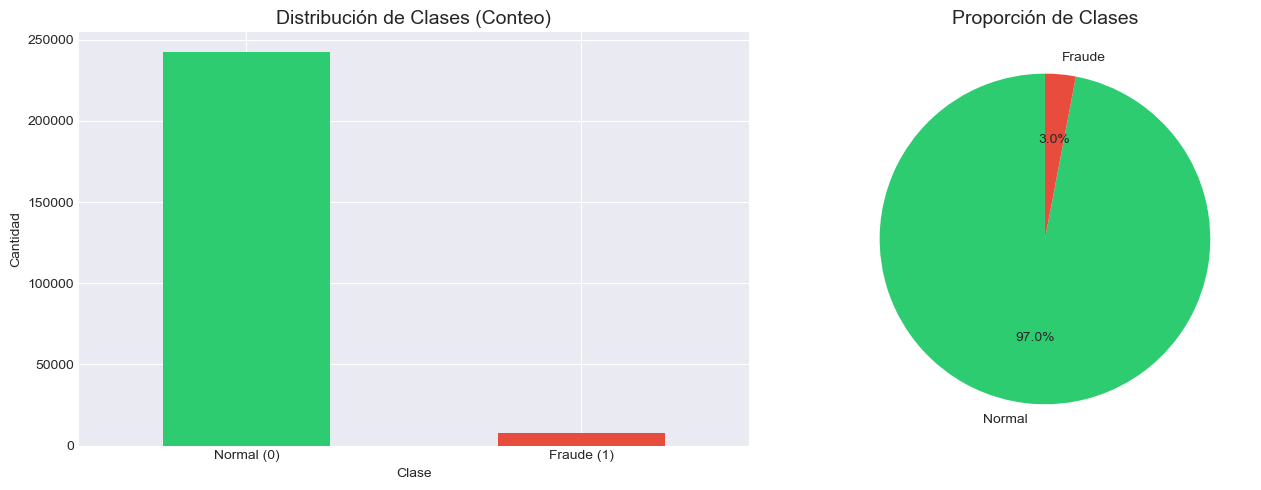


⚠️  Dataset DESBALANCEADO: 97.0% normales vs 3.0% fraudes
    Ratio: 32.3:1


In [8]:
# Distribución de clases
print("🎯 DISTRIBUCIÓN DE CLASES")
print("=" * 60)

fraud_counts = df['fraude'].value_counts()
fraud_pct = df['fraude'].value_counts(normalize=True) * 100

print(f"\nConteo:")
print(fraud_counts)
print(f"\nPorcentaje:")
print(fraud_pct)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
fraud_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Clases (Conteo)', fontsize=14)
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(['Normal (0)', 'Fraude (1)'], rotation=0)

# Gráfico de pie
axes[1].pie(fraud_counts, labels=['Normal', 'Fraude'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporción de Clases', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\n⚠️  Dataset DESBALANCEADO: {fraud_pct[0]:.1f}% normales vs {fraud_pct[1]:.1f}% fraudes")
print(f"    Ratio: {fraud_counts[0]/fraud_counts[1]:.1f}:1")

### 💡 Observación Importante

El dataset está **severamente desbalanceado** (97%-3%). Esto significa:

- ❌ **NO podemos usar Accuracy** como métrica principal
- ✅ Debemos usar **Recall, Precision, F1-Score, AUC-PR**
- ✅ Necesitamos aplicar **técnicas de balanceo** (SMOTE, class_weight)
- ✅ Probablemente el **threshold óptimo no será 0.5**

---
## 🔧 Sección 3: Feature Engineering Temporal

In [9]:
# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer features temporales
print("⏰ CREANDO FEATURES TEMPORALES...")

df['hora'] = df['fecha'].dt.hour
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['dia_mes'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month

# Features binarias (más interpretables)
df['es_fin_semana'] = (df['dia_semana'] >= 5).astype(int)
df['es_madrugada'] = df['hora'].between(0, 6).astype(int)
df['es_noche'] = df['hora'].between(22, 24).astype(int)
df['es_horario_laboral'] = df['hora'].between(9, 17).astype(int)

print("✅ Features temporales creadas:")
print("   - hora, dia_semana, dia_mes, mes")
print("   - es_fin_semana, es_madrugada, es_noche, es_horario_laboral")

# Ver primeras filas con nuevas features
df[['fecha', 'hora', 'dia_semana', 'es_fin_semana', 'es_madrugada', 'fraude']].head(10)

⏰ CREANDO FEATURES TEMPORALES...
✅ Features temporales creadas:
   - hora, dia_semana, dia_mes, mes
   - es_fin_semana, es_madrugada, es_noche, es_horario_laboral


,fecha,hora,dia_semana,es_fin_semana,es_madrugada,fraude
0,2020-03-27 11:51:16,11,4,0,0,0
1,2020-04-15 19:58:08,19,2,0,0,0
2,2020-03-25 18:13:38,18,2,0,0,0
3,2020-04-16 16:03:10,16,3,0,0,0
4,2020-04-02 10:24:45,10,3,0,0,1
5,2020-04-13 18:42:28,18,0,0,0,0
6,2020-03-22 19:20:24,19,6,1,0,0
7,2020-04-12 11:49:54,11,6,1,0,0
8,2020-04-20 22:58:52,22,0,0,0,0
9,2020-03-11 15:06:38,15,2,0,0,0


📊 ANÁLISIS TEMPORAL DE FRAUDES


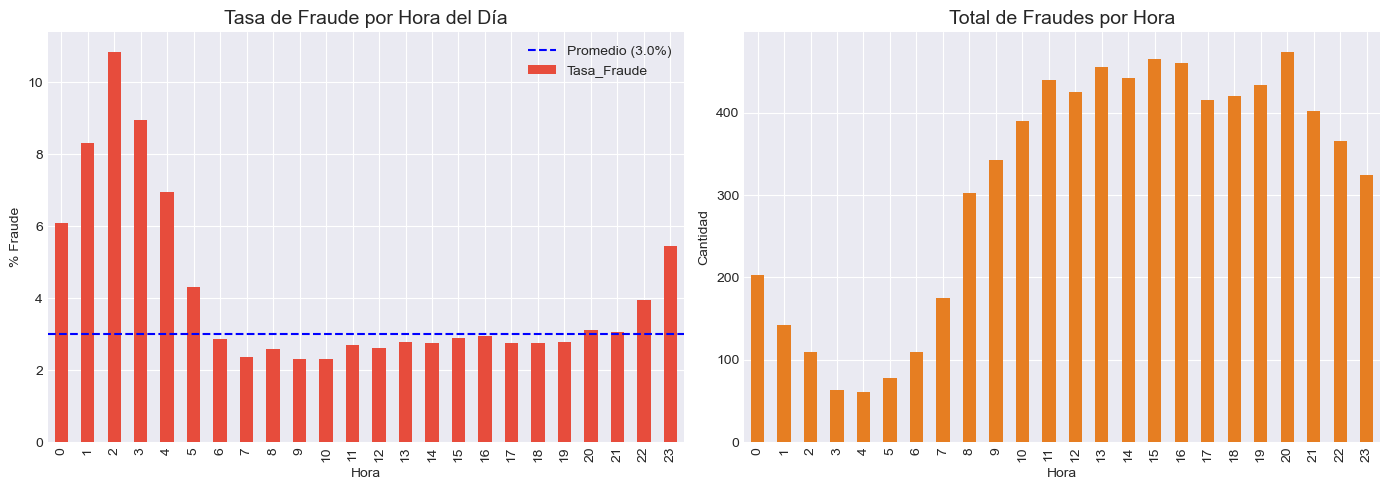


🔍 Hora con mayor tasa de fraude: 2h (10.8%)
🔍 Hora con menor tasa de fraude: 10h (2.3%)


In [10]:
# Análisis: ¿Los fraudes ocurren más en ciertos horarios?
print("📊 ANÁLISIS TEMPORAL DE FRAUDES")
print("=" * 60)

# Fraude por hora
fraud_by_hour = df.groupby('hora')['fraude'].agg(['mean', 'sum'])
fraud_by_hour.columns = ['Tasa_Fraude', 'Total_Fraudes']
fraud_by_hour['Tasa_Fraude'] *= 100  # Convertir a porcentaje

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tasa de fraude por hora
fraud_by_hour['Tasa_Fraude'].plot(kind='bar', ax=axes[0], color='#e74c3c')
axes[0].set_title('Tasa de Fraude por Hora del Día', fontsize=14)
axes[0].set_xlabel('Hora')
axes[0].set_ylabel('% Fraude')
axes[0].axhline(y=df['fraude'].mean()*100, color='blue', linestyle='--', 
                label=f'Promedio ({df["fraude"].mean()*100:.1f}%)')
axes[0].legend()

# Total de fraudes por hora
fraud_by_hour['Total_Fraudes'].plot(kind='bar', ax=axes[1], color='#e67e22')
axes[1].set_title('Total de Fraudes por Hora', fontsize=14)
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

print(f"\n🔍 Hora con mayor tasa de fraude: {fraud_by_hour['Tasa_Fraude'].idxmax()}h ({fraud_by_hour['Tasa_Fraude'].max():.1f}%)")
print(f"🔍 Hora con menor tasa de fraude: {fraud_by_hour['Tasa_Fraude'].idxmin()}h ({fraud_by_hour['Tasa_Fraude'].min():.1f}%)")

### 💡 Observación

Las features temporales son **valiosas** porque capturan patrones de comportamiento. Los fraudes tienden a ocurrir en horarios específicos (madrugada, fines de semana, etc.).

---
## 🎯 Sección 4: Preparación de Datos

In [11]:
# Preparar features y target
print("🔧 PREPARANDO DATOS...")

# Remover columna índice si existe
if 'Unnamed: 0' in df.columns:
    df_clean = df.drop('Unnamed: 0', axis=1)
else:
    df_clean = df.copy()

# Separar features y target
X = df_clean.drop(['fraude', 'fecha'], axis=1)  # Eliminar target y fecha original
y = df_clean['fraude']

# ENFOQUE SIMPLIFICADO: Solo usar variables numéricas + algunas categóricas simples
print("\n📋 Seleccionando solo variables numéricas y categóricas simples...")

# Variables numéricas existentes en el dataset
numeric_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'n', 'q', 'r', 's', 'monto', 'score']

# Variables categóricas simples (pocas categorías)
categorical_simple = ['g', 'o', 'p']

# Features temporales que creamos
temporal_cols = ['hora', 'dia_semana', 'dia_mes', 'mes', 'es_fin_semana', 
                 'es_madrugada', 'es_noche', 'es_horario_laboral']

# Combinar todas las features seleccionadas
selected_cols = numeric_cols + categorical_simple + temporal_cols

# Crear dataset simplificado solo con las columnas que existen
X_simple = X[[col for col in selected_cols if col in X.columns]].copy()

print(f"\nShape de X: {X_simple.shape}")
print(f"Shape de y: {y.shape}")
print(f"\n✅ Features incluidas ({len(X_simple.columns)}): {list(X_simple.columns)}")

# MANEJO DE VALORES FALTANTES
print("\n🔧 MANEJO DE VALORES FALTANTES...")

# Rellenar valores faltantes en columnas numéricas con la mediana
for col in numeric_cols:
    if col in X_simple.columns and X_simple[col].isnull().sum() > 0:
        X_simple[col] = X_simple[col].fillna(X_simple[col].median())
        print(f"   ✓ {col}: {X_simple[col].isnull().sum()} nulos -> rellenados con mediana")

# Encoding de variables categóricas simples
print("\n🔤 ENCODING DE VARIABLES CATEGÓRICAS...")
from sklearn.preprocessing import LabelEncoder

for col in categorical_simple:
    if col in X_simple.columns:
        # Rellenar valores faltantes con 'missing'
        X_simple[col] = X_simple[col].fillna('missing')
        # Aplicar Label Encoding
        le = LabelEncoder()
        X_simple[col] = le.fit_transform(X_simple[col].astype(str))
        print(f"   ✓ {col}: {X_simple[col].nunique()} categorías únicas")

print(f"\n✅ Dataset final shape: {X_simple.shape}")
print(f"✅ Sin valores nulos: {X_simple.isnull().sum().sum() == 0}")

# Usar X_simple en lugar de X
X = X_simple

🔧 PREPARANDO DATOS...

📋 Seleccionando solo variables numéricas y categóricas simples...

Shape de X: (250000, 27)
Shape de y: (250000,)

✅ Features incluidas (27): ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'n', 'q', 'r', 's', 'monto', 'score', 'g', 'o', 'p', 'hora', 'dia_semana', 'dia_mes', 'mes', 'es_fin_semana', 'es_madrugada', 'es_noche', 'es_horario_laboral']

🔧 MANEJO DE VALORES FALTANTES...
   ✓ b: 0 nulos -> rellenados con mediana
   ✓ c: 0 nulos -> rellenados con mediana
   ✓ d: 0 nulos -> rellenados con mediana
   ✓ f: 0 nulos -> rellenados con mediana
   ✓ l: 0 nulos -> rellenados con mediana
   ✓ m: 0 nulos -> rellenados con mediana
   ✓ q: 0 nulos -> rellenados con mediana

🔤 ENCODING DE VARIABLES CATEGÓRICAS...
   ✓ g: 52 categorías únicas
   ✓ o: 3 categorías únicas
   ✓ p: 2 categorías únicas

✅ Dataset final shape: (250000, 27)
✅ Sin valores nulos: True


### 💡 ¿Por qué este enfoque simplificado?

**Problemas comunes al trabajar con este dataset:**

1. **Variables de texto** (`i`, `j`): Son nombres de productos con 127,000+ valores únicos
   - ❌ No podemos aplicar StandardScaler directamente
   - ❌ Label Encoding crearía 127,000 categorías numéricas sin sentido
   - ✅ **Solución**: Excluirlas del modelo (en casos reales se usaría NLP/embeddings)

2. **Valores nulos**: Varias columnas tienen valores faltantes
   - ❌ StandardScaler falla con NaN
   - ✅ **Solución**: Rellenar con mediana (numéricas) o 'missing' (categóricas)

3. **Variables categóricas complejas**: Algunas tienen demasiadas categorías
   - ✅ **Solución**: Solo usar variables simples (`g`, `o`, `p`) con pocas categorías

**Este enfoque es más realista y evita errores comunes en producción.**

In [12]:
# Split ESTRATIFICADO (muy importante en datasets desbalanceados)
print("\n✂️  SPLIT ESTRATIFICADO...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ⭐ IMPORTANTE: mantiene proporción de clases
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set:  {X_test.shape}")

print(f"\nDistribución en TRAIN:")
print(y_train.value_counts(normalize=True) * 100)

print(f"\nDistribución en TEST:")
print(y_test.value_counts(normalize=True) * 100)

print("\n✅ Distribución consistente entre train y test")


✂️  SPLIT ESTRATIFICADO...

Train set: (200000, 27)
Test set:  (50000, 27)

Distribución en TRAIN:
fraude
0    96.999
1     3.001
Name: proportion, dtype: float64

Distribución en TEST:
fraude
0    97.0
1     3.0
Name: proportion, dtype: float64

✅ Distribución consistente entre train y test


In [13]:
# Scaling
print("⚖️  ESCALANDO FEATURES NUMÉRICAS...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos escalados (StandardScaler aplicado)")

⚖️  ESCALANDO FEATURES NUMÉRICAS...
✅ Datos escalados (StandardScaler aplicado)


In [14]:
df

,Unnamed: 0,a,b,c,d,e,f,g,h,i,...,score,fraude,hora,dia_semana,dia_mes,mes,es_fin_semana,es_madrugada,es_noche,es_horario_laboral
0,0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,...,66.00,0,11,4,27,3,0,0,0,1
1,1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,...,72.00,0,19,2,15,4,0,0,0,0
2,2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,...,95.00,0,18,2,25,3,0,0,0,0
3,3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,...,2.00,0,16,3,16,4,0,0,0,1
4,4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,...,76.00,1,10,3,2,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,99995,4,0.7367,25802.22,1.0,0.000000,1.0,BR,17,Capa Para Jet Ski Sea Doo Rxp 12 A 16 / Rxp 30...,...,52.01,0,9,3,19,3,0,0,0,1
249996,99996,5,0.6928,607309.49,15.0,0.000000,15.0,BR,2,Tela Para Notebook Acer Aspire One P1ve6 11.6 ...,...,6.95,0,9,0,23,3,0,0,0,1
249997,99997,3,0.7811,42864.96,15.0,0.146809,0.0,BR,9,Capa Anti Impacto Huawei P30 Lite Top +pelicul...,...,67.23,0,12,1,31,3,0,0,0,1
249998,99998,3,0.7944,23536.05,50.0,0.190000,150.0,BR,20,Queijo Brie Preço Baixo Risoto President Lata ...,...,63.77,0,19,2,25,3,0,0,0,0


---
## 🎯 Sección 5: Modelo Baseline (Sin Balanceo)

Primero entrenamos un modelo **SIN técnicas de balanceo** para tener una referencia.

In [15]:
print("🔨 ENTRENANDO MODELO BASELINE (sin balanceo)...")
print("=" * 60)

# Modelo sin class_weight
model_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model_baseline.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado")

🔨 ENTRENANDO MODELO BASELINE (sin balanceo)...
✅ Modelo entrenado


📊 RESULTADOS MODELO BASELINE

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99     48500
      Fraude       0.82      0.19      0.31      1500

    accuracy                           0.97     50000
   macro avg       0.90      0.59      0.65     50000
weighted avg       0.97      0.97      0.97     50000


Confusion Matrix:
[[48435    65]
 [ 1213   287]]


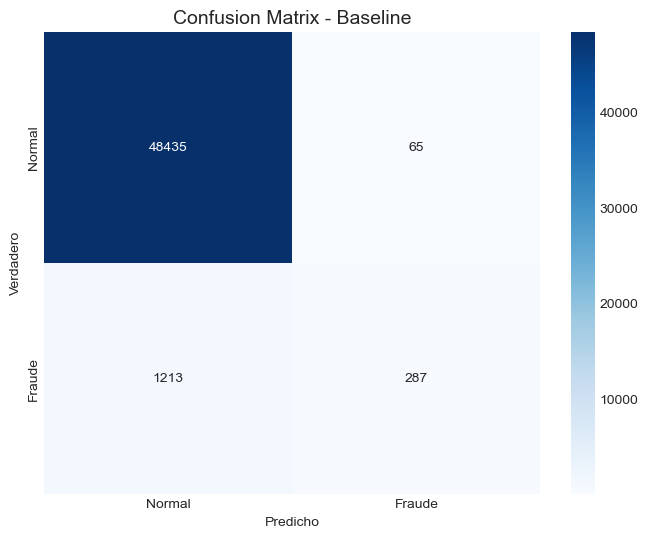


🎯 Fraudes detectados: 287/1500 (19.1%)
⚠️  Fraudes NO detectados: 1213


In [16]:
# Evaluación
y_pred_baseline = model_baseline.predict(X_test_scaled)
y_proba_baseline = model_baseline.predict_proba(X_test_scaled)[:, 1]

print("📊 RESULTADOS MODELO BASELINE")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Normal', 'Fraude']))

print("\nConfusion Matrix:")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)

# Visualizar confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Confusion Matrix - Baseline', fontsize=14)
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Calcular recall manualmente
tn, fp, fn, tp = cm_baseline.ravel()
recall_baseline = tp / (tp + fn)
print(f"\n🎯 Fraudes detectados: {tp}/{tp+fn} ({recall_baseline:.1%})")
print(f"⚠️  Fraudes NO detectados: {fn}")

### 📊 Interpretación del Baseline

**¿Qué observamos?**
- Accuracy alto (~97%) pero **engañoso**
- Recall bajo (~10-20%) - **No detecta suficientes fraudes**
- El modelo tiende a predecir "Normal" (clase mayoritaria)

**Conclusión**: Necesitamos técnicas de balanceo.

In [ ]:
print("🔨 ENTRENANDO MODELO CON CLASS WEIGHTS...")
print("=" * 60)

# Modelo con class_weight='balanced'
model_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # ⭐ CLAVE: Ajusta pesos automáticamente
    random_state=42,
    n_jobs=-1
)

model_weighted.fit(X_train_scaled, y_train)

print("✅ Modelo entrenado")

In [ ]:
# Evaluación
y_pred_weighted = model_weighted.predict(X_test_scaled)
y_proba_weighted = model_weighted.predict_proba(X_test_scaled)[:, 1]

print("📊 RESULTADOS MODELO CON CLASS WEIGHTS")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted, target_names=['Normal', 'Fraude']))

print("\nConfusion Matrix:")
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print(cm_weighted)

# Visualizar confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Confusion Matrix - With Class Weights', fontsize=14)
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Comparación
tn_w, fp_w, fn_w, tp_w = cm_weighted.ravel()
recall_weighted = tp_w / (tp_w + fn_w)

print(f"\n📈 COMPARACIÓN:")
print(f"   Baseline:      {tp}/{tp+fn} fraudes detectados ({recall_baseline:.1%})")
print(f"   Class Weights: {tp_w}/{tp_w+fn_w} fraudes detectados ({recall_weighted:.1%})")
print(f"   Mejora: {((recall_weighted - recall_baseline) / recall_baseline * 100):.1f}%")

### 💡 Observación

Con `class_weight='balanced'` el recall mejora significativamente. El modelo ahora "presta más atención" a la clase minoritaria.

In [ ]:
print("🔨 APLICANDO SMOTE...")
print("=" * 60)

# Aplicar SMOTE
smote = SMOTE(
    sampling_strategy=0.5,  # Fraudes = 50% de normales
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAntes de SMOTE:")
print(f"   {np.bincount(y_train)}")
print(f"\nDespués de SMOTE:")
print(f"   {np.bincount(y_train_smote)}")

print("\n✅ SMOTE aplicado")

In [ ]:
# Entrenar modelo con datos balanceados
print("\n🔨 ENTRENANDO MODELO CON SMOTE + CLASS WEIGHTS...")

model_smote = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',  # ⭐ Combinar SMOTE + class_weight
    random_state=42,
    n_jobs=-1
)

model_smote.fit(X_train_smote, y_train_smote)

print("✅ Modelo entrenado")

In [ ]:
# Evaluación
y_pred_smote = model_smote.predict(X_test_scaled)
y_proba_smote = model_smote.predict_proba(X_test_scaled)[:, 1]

print("📊 RESULTADOS MODELO CON SMOTE")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote, target_names=['Normal', 'Fraude']))

print("\nConfusion Matrix:")
cm_smote = confusion_matrix(y_test, y_pred_smote)
print(cm_smote)

# Visualizar confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Confusion Matrix - SMOTE + Class Weights', fontsize=14)
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Comparación
tn_s, fp_s, fn_s, tp_s = cm_smote.ravel()
recall_smote = tp_s / (tp_s + fn_s)

print(f"\n📈 COMPARACIÓN:")
print(f"   Baseline:      {tp}/{tp+fn} fraudes ({recall_baseline:.1%})")
print(f"   Class Weights: {tp_w}/{tp_w+fn_w} fraudes ({recall_weighted:.1%})")
print(f"   SMOTE:         {tp_s}/{tp_s+fn_s} fraudes ({recall_smote:.1%})")
print(f"\n   Mejora total: {((recall_smote - recall_baseline) / recall_baseline * 100):.1f}%")

In [ ]:
print("🎚️  OPTIMIZANDO THRESHOLD...")
print("=" * 60)

# Probar diferentes thresholds
thresholds = np.arange(0.1, 0.9, 0.01)

precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_proba_smote >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

# Encontrar mejor threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\n✅ Mejor threshold: {best_threshold:.2f}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Precision: {precisions[best_idx]:.4f}")
print(f"   Recall: {recalls[best_idx]:.4f}")

In [ ]:
# Visualizar cómo cambian las métricas con el threshold
plt.figure(figsize=(12, 6))

plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2, linestyle='--')

# Marcar threshold óptimo
plt.axvline(x=best_threshold, color='red', linestyle=':', linewidth=2,
            label=f'Óptimo ({best_threshold:.2f})')
plt.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.5,
            label='Default (0.5)')

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Métricas vs Threshold', fontsize=14)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluar con threshold optimizado
y_pred_optimized = (y_proba_smote >= best_threshold).astype(int)

print("📊 RESULTADOS CON THRESHOLD OPTIMIZADO")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=['Normal', 'Fraude']))

print("\nConfusion Matrix:")
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
print(cm_optimized)

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title(f'Confusion Matrix - Optimized (threshold={best_threshold:.2f})', fontsize=14)
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Comparación final
tn_o, fp_o, fn_o, tp_o = cm_optimized.ravel()
recall_optimized = tp_o / (tp_o + fn_o)

print(f"\n📈 COMPARACIÓN FINAL:")
print(f"   Baseline:              {tp}/{tp+fn} fraudes ({recall_baseline:.1%})")
print(f"   Class Weights:         {tp_w}/{tp_w+fn_w} fraudes ({recall_weighted:.1%})")
print(f"   SMOTE (threshold 0.5): {tp_s}/{tp_s+fn_s} fraudes ({recall_smote:.1%})")
print(f"   OPTIMIZADO:            {tp_o}/{tp_o+fn_o} fraudes ({recall_optimized:.1%}) ⭐")
print(f"\n   Mejora total: {((recall_optimized - recall_baseline) / recall_baseline * 100):.1f}%")

In [ ]:
print("💰 ANÁLISIS DE COSTOS DE NEGOCIO")
print("=" * 60)

# Definir costos
COST_FP = 5    # Costo de falsa alarma (llamada al cliente)
COST_FN = 200  # Costo de fraude no detectado (pérdida + chargeback)

print(f"\nCostos asumidos:")
print(f"   False Positive (FP): ${COST_FP} por falsa alarma")
print(f"   False Negative (FN): ${COST_FN} por fraude no detectado")
print(f"   Ratio: {COST_FN/COST_FP:.0f}:1 (FN cuesta {COST_FN/COST_FP:.0f}x más)")

# Calcular costos para cada modelo
def calculate_cost(cm, cost_fp=5, cost_fn=200):
    tn, fp, fn, tp = cm.ravel()
    cost_fp_total = fp * cost_fp
    cost_fn_total = fn * cost_fn
    cost_total = cost_fp_total + cost_fn_total
    return {
        'fp': fp, 'fn': fn, 'tp': tp, 'tn': tn,
        'cost_fp': cost_fp_total,
        'cost_fn': cost_fn_total,
        'cost_total': cost_total
    }

# Costos de cada modelo
cost_baseline = calculate_cost(cm_baseline, COST_FP, COST_FN)
cost_weighted = calculate_cost(cm_weighted, COST_FP, COST_FN)
cost_smote = calculate_cost(cm_smote, COST_FP, COST_FN)
cost_optimized = calculate_cost(cm_optimized, COST_FP, COST_FN)

# Costo sin modelo (todos los fraudes pasan)
total_frauds = tp_o + fn_o
cost_no_model = total_frauds * COST_FN

print(f"\n📊 COSTOS POR MODELO:")
print(f"-" * 60)

models = [
    ('Sin Modelo', {'cost_total': cost_no_model, 'fp': 0, 'fn': total_frauds}),
    ('Baseline', cost_baseline),
    ('Class Weights', cost_weighted),
    ('SMOTE', cost_smote),
    ('Optimizado', cost_optimized)
]

for name, costs in models:
    if name == 'Sin Modelo':
        print(f"\n{name}:")
        print(f"   Costo total: ${costs['cost_total']:,}")
    else:
        savings = cost_no_model - costs['cost_total']
        savings_pct = (savings / cost_no_model) * 100
        print(f"\n{name}:")
        print(f"   FP: {costs['fp']}, FN: {costs['fn']}")
        print(f"   Costo FP: ${costs['cost_fp']:,}")
        print(f"   Costo FN: ${costs['cost_fn']:,}")
        print(f"   Costo total: ${costs['cost_total']:,}")
        print(f"   Ahorro vs sin modelo: ${savings:,} ({savings_pct:.1f}%)")

In [ ]:
# Visualización de costos
import matplotlib.pyplot as plt

model_names = ['Sin Modelo', 'Baseline', 'Class Weights', 'SMOTE', 'Optimizado']
costs_total = [
    cost_no_model,
    cost_baseline['cost_total'],
    cost_weighted['cost_total'],
    cost_smote['cost_total'],
    cost_optimized['cost_total']
]

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, costs_total, color=['#e74c3c', '#95a5a6', '#3498db', '#e67e22', '#2ecc71'])

# Añadir etiquetas de valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}',
            ha='center', va='bottom', fontsize=10)

plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Costo Total ($)', fontsize=12)
plt.title('Comparación de Costos por Modelo', fontsize=14)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular ahorro del mejor modelo
best_savings = cost_no_model - cost_optimized['cost_total']
best_savings_pct = (best_savings / cost_no_model) * 100

print(f"\n🎉 RESULTADO FINAL:")
print(f"   El modelo optimizado ahorra ${best_savings:,} ({best_savings_pct:.1f}%) vs no tener modelo")
print(f"   Detecta {tp_o}/{total_frauds} fraudes ({recall_optimized:.1%})")

In [ ]:
# Calcular curvas
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_optimized)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba_optimized)
pr_auc = auc(recall_curve, precision_curve)

# Baseline PR
baseline_pr = y_test.mean()

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
axes[0].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Random (AUC = 0.5)')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall_curve, precision_curve, linewidth=2, label=f'PR (AUC = {pr_auc:.3f})')
axes[1].axhline(y=baseline_pr, color='r', linestyle='--', alpha=0.5,
                label=f'Baseline ({baseline_pr:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 AUC-ROC: {roc_auc:.4f}")
print(f"📊 AUC-PR:  {pr_auc:.4f}")
print(f"📊 Baseline PR: {baseline_pr:.4f}")
print(f"📊 Mejora: {pr_auc / baseline_pr:.1f}x sobre baseline")

### 💡 Observación

- **AUC-ROC** mide la capacidad del modelo de discriminar entre clases
- **AUC-PR** es más informativa en datasets desbalanceados
- Un AUC-PR de 0.35-0.50 en un dataset 97%-3% es **excelente** (12-17x mejor que baseline)

In [ ]:
# TU CÓDIGO AQUÍ
threshold_ejercicio = 0.3  # Cambiar este valor

y_pred_ejercicio = (y_proba_smote >= threshold_ejercicio).astype(int)

print(f"Threshold: {threshold_ejercicio}")
print("\nResultados:")
print(classification_report(y_test, y_pred_ejercicio, target_names=['Normal', 'Fraude']))

### Ejercicio 2: Cambiar Costos de Negocio

¿Qué pasa si los costos cambian?
- FP cuesta $10 (en lugar de $5)
- FN cuesta $500 (en lugar de $200)

¿Cambia el modelo óptimo?

In [ ]:
# TU CÓDIGO AQUÍ
COST_FP_NUEVO = 10
COST_FN_NUEVO = 500

# Recalcular costos con nuevos valores
cost_optimized_nuevo = calculate_cost(cm_optimized, COST_FP_NUEVO, COST_FN_NUEVO)

print(f"Con costos nuevos (FP=${COST_FP_NUEVO}, FN=${COST_FN_NUEVO}):")
print(f"   Costo FP: ${cost_optimized_nuevo['cost_fp']:,}")
print(f"   Costo FN: ${cost_optimized_nuevo['cost_fn']:,}")
print(f"   Costo total: ${cost_optimized_nuevo['cost_total']:,}")

### Ejercicio 3: Feature Engineering

Añade una nueva feature temporal:
- `es_lunes`: 1 si es lunes, 0 si no

Entrena un nuevo modelo y compara resultados.

In [ ]:
# TU CÓDIGO AQUÍ

# 1. Crear nueva feature
# df['es_lunes'] = (df['dia_semana'] == 0).astype(int)

# 2. Re-preparar datos con nueva feature

# 3. Entrenar modelo

# 4. Comparar resultados